In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import time


In [11]:
data = pd.read_csv("data.csv")
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [13]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [14]:
print(time.strftime('%Y-%m-%d', time.localtime(data['DATE'].max())),
      time.strftime('%Y-%m-%d', time.localtime(data['DATE'].min())))

2017-09-01 2017-04-03


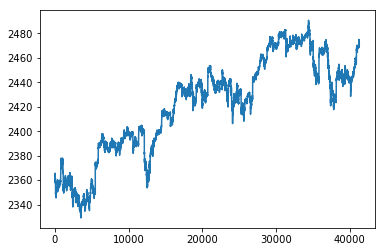

In [15]:
plt.plot(data['SP500'])

In [16]:
data.drop('DATE', axis=1, inplace=True)
data_train = data.iloc[:int(data.shape[0] * 0.8), :]
data_test = data.iloc[int(data.shape[0] * 0.8):, :]
print(data_train.shape, data_test.shape)

(33012, 501) (8254, 501)


In [17]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

MSE Train: 0.689171
MSE Test: 1.10358


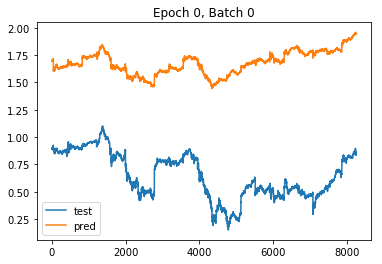

MSE Train: 0.000784128
MSE Test: 0.0379327


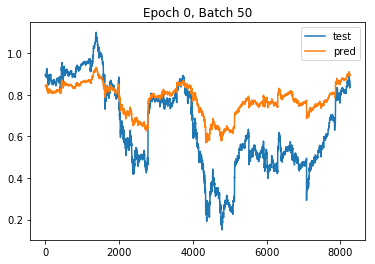

MSE Train: 0.000242807
MSE Test: 0.0291262


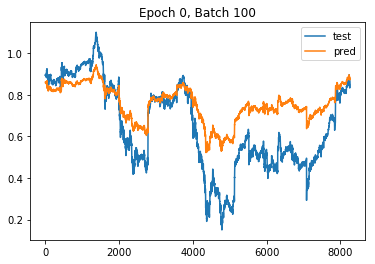

MSE Train: 0.000190831
MSE Test: 0.0267743


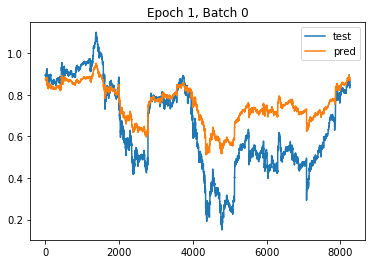

MSE Train: 0.000161775
MSE Test: 0.0215236


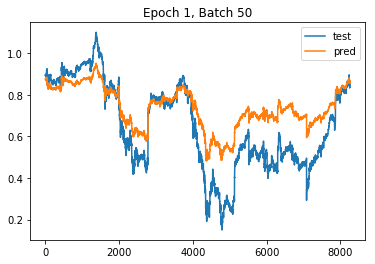

MSE Train: 0.00016842
MSE Test: 0.0210742


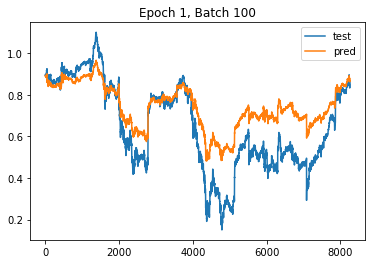

MSE Train: 0.000134964
MSE Test: 0.018816


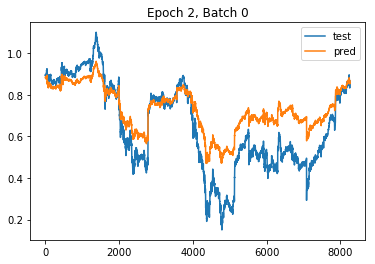

MSE Train: 0.000103866
MSE Test: 0.016712


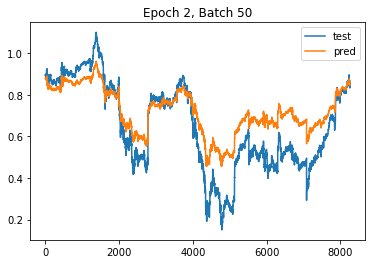

MSE Train: 8.44482e-05
MSE Test: 0.0142738


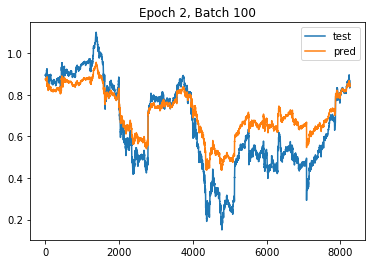

MSE Train: 0.000142043
MSE Test: 0.0140115


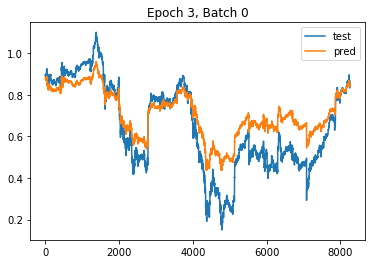

MSE Train: 0.000549632
MSE Test: 0.0134446


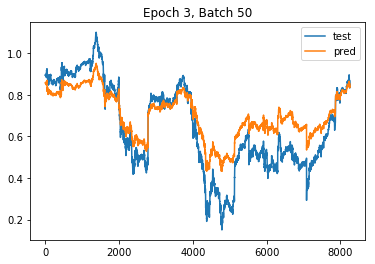

MSE Train: 9.07002e-05
MSE Test: 0.0128029


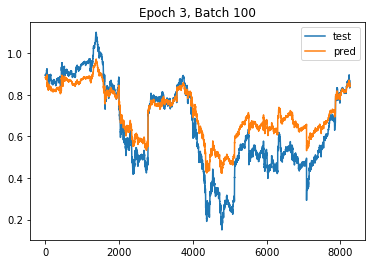

MSE Train: 0.000127317
MSE Test: 0.0106684


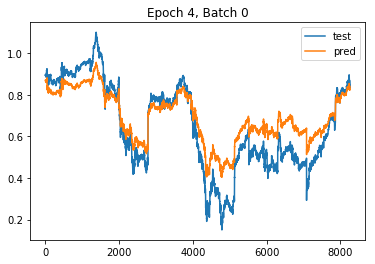

MSE Train: 7.15729e-05
MSE Test: 0.0104348


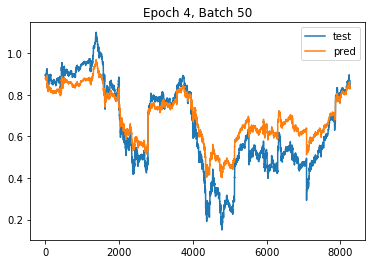

MSE Train: 0.000103622
MSE Test: 0.00956001


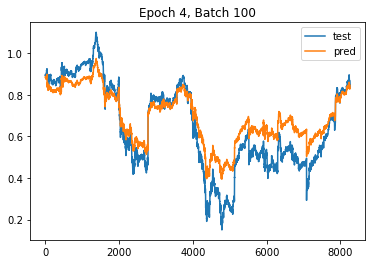

MSE Train: 7.63911e-05
MSE Test: 0.00901375


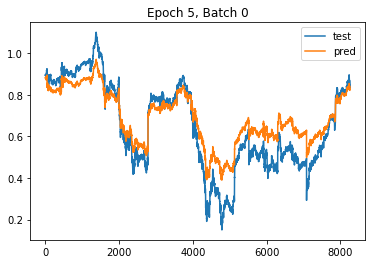

MSE Train: 0.00014727
MSE Test: 0.0080851


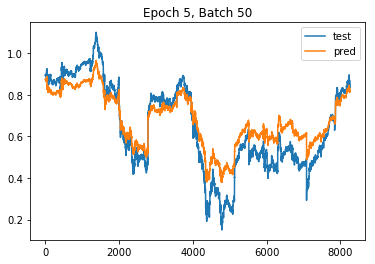

MSE Train: 6.67375e-05
MSE Test: 0.00790817


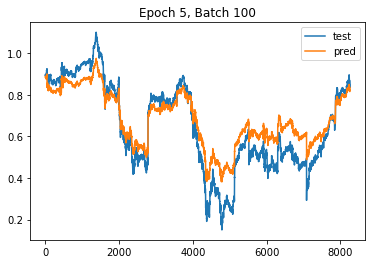

MSE Train: 7.80245e-05
MSE Test: 0.00855066


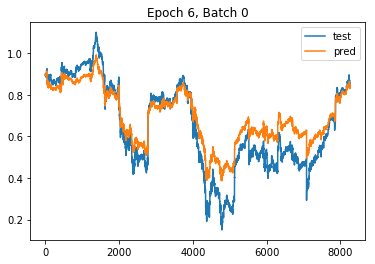

MSE Train: 7.52918e-05
MSE Test: 0.00760608


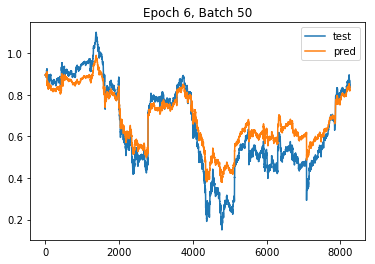

MSE Train: 8.40886e-05
MSE Test: 0.0063826


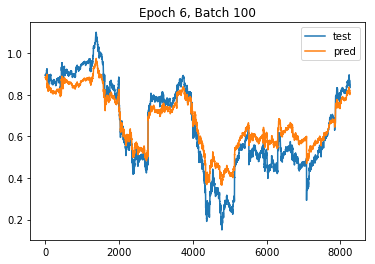

MSE Train: 7.57821e-05
MSE Test: 0.00684651


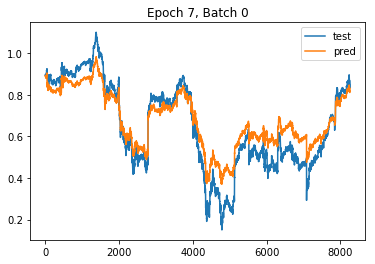

MSE Train: 8.89057e-05
MSE Test: 0.0059929


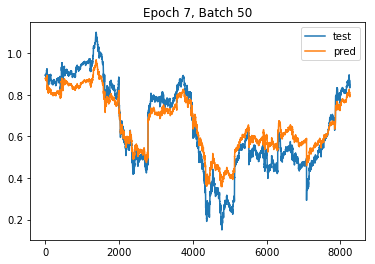

MSE Train: 9.20646e-05
MSE Test: 0.00617519


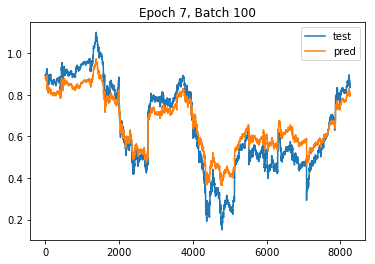

MSE Train: 0.000153082
MSE Test: 0.00632085


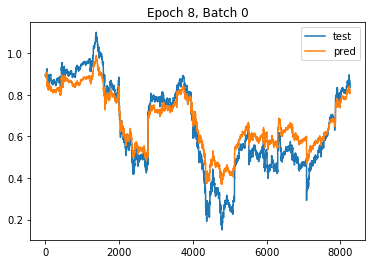

MSE Train: 6.92429e-05
MSE Test: 0.00585696


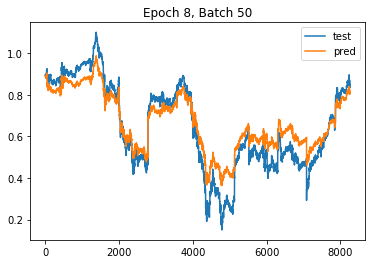

MSE Train: 6.18445e-05
MSE Test: 0.00586477


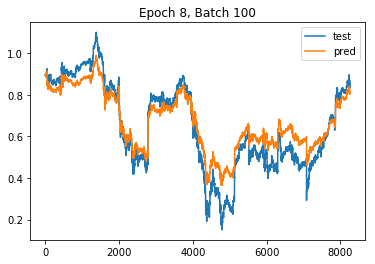

MSE Train: 0.00012617
MSE Test: 0.00664751


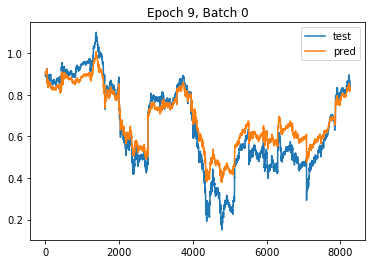

MSE Train: 0.00010255
MSE Test: 0.00560886


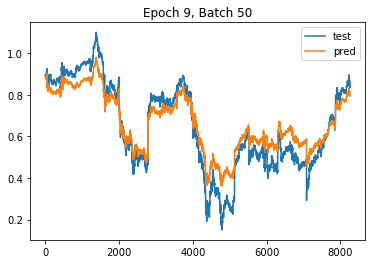

MSE Train: 5.69495e-05
MSE Test: 0.00571486


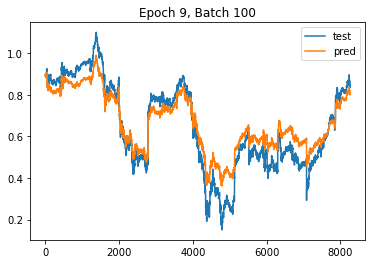

In [9]:
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

input_dim = X_train.shape[1]
hidden_1 = 1024
hidden_2 = 512
hidden_3 = 256
hidden_4 = 128
output_dim = 1
batch_size = 256
epochs = 10

tf.reset_default_graph()

X = tf.placeholder(shape=[None, input_dim], dtype=tf.float32)
Y = tf.placeholder(shape=[None], dtype=tf.float32)

W1 = tf.get_variable('W1', [input_dim, hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b1 = tf.get_variable('b1', [hidden_1], initializer=tf.zeros_initializer())
W2 = tf.get_variable('W2', [hidden_1, hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b2 = tf.get_variable('b2', [hidden_2], initializer=tf.zeros_initializer())
W3 = tf.get_variable('W3', [hidden_2, hidden_3], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b3 = tf.get_variable('b3', [hidden_3], initializer=tf.zeros_initializer())
W4 = tf.get_variable('W4', [hidden_3, hidden_4], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b4 = tf.get_variable('b4', [hidden_4], initializer=tf.zeros_initializer())
W5 = tf.get_variable('W5', [hidden_4, output_dim], initializer=tf.contrib.layers.xavier_initializer(seed=1))
b5 = tf.get_variable('b5', [output_dim], initializer=tf.zeros_initializer())

h1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
h2 = tf.nn.relu(tf.add(tf.matmul(h1, W2), b2))
h3 = tf.nn.relu(tf.add(tf.matmul(h2, W3), b3))
h4 = tf.nn.relu(tf.add(tf.matmul(h3, W4), b4))
out = tf.transpose(tf.add(tf.matmul(h4, W5), b5))

cost = tf.reduce_mean(tf.squared_difference(out, Y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(epochs):
        shuffle_indices = np.random.permutation(np.arange(y_train.shape[0]))
        X_train = X_train[shuffle_indices]
        y_train = y_train[shuffle_indices]

        for i in range(y_train.shape[0] // batch_size):
            start = i * batch_size
            batch_x = X_train[start : start + batch_size]
            batch_y = y_train[start : start + batch_size]
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})

            if i % 50 == 0:
                print('MSE Train:', sess.run(cost, feed_dict={X: X_train, Y: y_train}))
                print('MSE Test:', sess.run(cost, feed_dict={X: X_test, Y: y_test}))
                y_pred = sess.run(out, feed_dict={X: X_test})
                y_pred = np.squeeze(y_pred)
                plt.plot(y_test, label='test')
                plt.plot(y_pred, label='pred')
                plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
                plt.legend()
                plt.show()

Using TensorFlow backend.


Epoch 1/10
33012/33012 [==============================] - 3s - loss: 0.1257     
Epoch 2/10
33012/33012 [==============================] - 2s - loss: 0.1215     
Epoch 3/10
33012/33012 [==============================] - 2s - loss: 0.1151     
Epoch 4/10
33012/33012 [==============================] - 2s - loss: 0.1073     
Epoch 5/10
33012/33012 [==============================] - 2s - loss: 0.1037     
Epoch 6/10
33012/33012 [==============================] - 2s - loss: 0.1053     
Epoch 7/10
33012/33012 [==============================] - 2s - loss: 0.1054     
Epoch 8/10
33012/33012 [==============================] - 2s - loss: 0.1054     
Epoch 9/10
33012/33012 [==============================] - 2s - loss: 0.1109     
Epoch 10/10
7168/8254 [=========================>....] - ETA: 0sMSE Test: 0.0512928775561


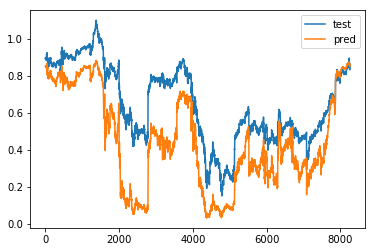

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

input_dim = X_train.shape[1]
hidden_1 = 1024
hidden_2 = 512
hidden_3 = 256
hidden_4 = 128
output_dim = 1
batch_size = 256
epochs = 10

X = Input(shape=[input_dim,])
h = Dense(hidden_1, activation='relu')(X)
h = Dense(hidden_2, activation='relu')(h)
h = Dense(hidden_3, activation='relu')(h)
h = Dense(hidden_4, activation='relu')(h)
Y = Dense(output_dim, activation='sigmoid')(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

(33007, 5, 1) (33007,) (8249, 5, 1) (8249,)
Epoch 1/10
33007/33007 [==============================] - 2s - loss: 0.2950     
Epoch 2/10
33007/33007 [==============================] - 1s - loss: 0.1055     
Epoch 3/10
33007/33007 [==============================] - 2s - loss: 0.1047     
Epoch 4/10
33007/33007 [==============================] - 1s - loss: 0.1034     
Epoch 5/10
33007/33007 [==============================] - 2s - loss: 0.1025     
Epoch 6/10
33007/33007 [==============================] - 2s - loss: 0.1021     
Epoch 7/10
33007/33007 [==============================] - 1s - loss: 0.1020     
Epoch 8/10
33007/33007 [==============================] - 1s - loss: 0.1020     
Epoch 9/10
33007/33007 [==============================] - 2s - loss: 0.1020     
Epoch 10/10
7680/8249 [==========================>...] - ETA: 0sMSE Test: 0.0034418604137


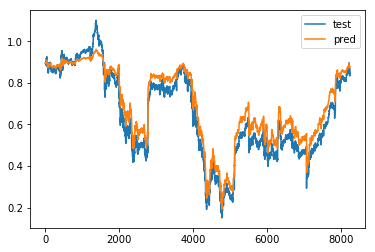

In [11]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model

output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128

X_train = np.array([data_train[i : i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])[:, :, np.newaxis]
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])[:, :, np.newaxis]
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X = Input(shape=[X_train.shape[1], X_train.shape[2],])
h = LSTM(hidden_size, activation='relu')(X)
Y = Dense(output_dim, activation='sigmoid')(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()

(33007, 5, 501) (33007,) (8249, 5, 501) (8249,)
Epoch 1/10
33007/33007 [==============================] - 4s - loss: 0.1177     
Epoch 2/10
33007/33007 [==============================] - 3s - loss: 0.1114     
Epoch 3/10
33007/33007 [==============================] - 4s - loss: 0.1040     
Epoch 4/10
33007/33007 [==============================] - 3s - loss: 0.1055     
Epoch 5/10
33007/33007 [==============================] - 4s - loss: 0.1061     
Epoch 6/10
33007/33007 [==============================] - 4s - loss: 0.1058     
Epoch 7/10
33007/33007 [==============================] - 4s - loss: 0.1131     
Epoch 8/10
33007/33007 [==============================] - 4s - loss: 0.1040     
Epoch 9/10
33007/33007 [==============================] - 4s - loss: 0.1052     
Epoch 10/10
8249/8249 [==============================] - 0s     
MSE Test: 0.00764097392644


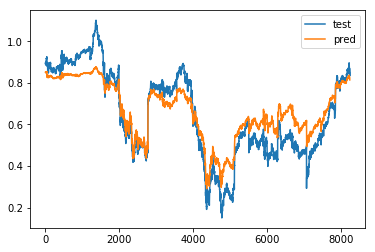

In [12]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model

output_dim = 1
batch_size = 256
epochs = 10
seq_len = 5
hidden_size = 128

X_train = np.array([data_train[i : i + seq_len, :] for i in range(data_train.shape[0] - seq_len)])
y_train = np.array([data_train[i + seq_len, 0] for i in range(data_train.shape[0] - seq_len)])
X_test = np.array([data_test[i : i + seq_len, :] for i in range(data_test.shape[0] - seq_len)])
y_test = np.array([data_test[i + seq_len, 0] for i in range(data_test.shape[0] - seq_len)])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

X = Input(shape=[X_train.shape[1], X_train.shape[2],])
h = LSTM(hidden_size, activation='relu')(X)
Y = Dense(output_dim, activation='sigmoid')(h)

model = Model(X, Y)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=False)
y_pred = model.predict(X_test)
print('MSE Train:', model.evaluate(X_train, y_train, batch_size=batch_size))
print('MSE Test:', model.evaluate(X_test, y_test, batch_size=batch_size))
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()